In [5]:
import tensorflow.compat.v2 as tf
import tensorflow_hub as hub
from transformers import ViTFeatureExtractor, ViTForImageClassification
from PIL import Image
import requests

# Import model

In [6]:
# m = hub.KerasLayer('https://tfhub.dev/google/aiy/vision/classifier/food_V1/1')
m = hub.KerasLayer('model')

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


# Image test

In [7]:
import numpy as np
import pandas as pd
import cv2
from skimage import io

In [8]:
cake_url = "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQzqDzXq1dGTBAHbsj62IFMTKBLChIC-PvtVw&usqp=CAU"

cake_url = "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRuIH9sRcZwHe7MjnkoU1n-rLUY2IGTAiPBKQ&usqp=CAU"

cake_url = "https://storage.googleapis.com/tfhub-visualizers/google/aiy/vision/classifier/food_V1/1/image_1.jpg"



cake_url = "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQiQCohZJ791tQI_cy_nUeYGgNIMvuQ02q-6A&usqp=CAU"




labelmap_url = "https://www.gstatic.com/aihub/tfhub/labelmaps/aiy_food_V1_labelmap.csv"
input_shape = (224, 224)

In [9]:
!pwd

/home/matteo/Documents/hachathon_yeah_nov2022/HackYeah/ml_files


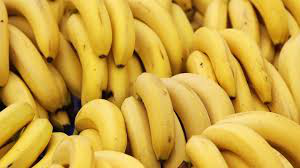

In [10]:
image = Image.open(requests.get(cake_url, stream=True).raw)
image

In [11]:
image = np.asarray(io.imread(cake_url), dtype="float")
image = cv2.resize(image, dsize=input_shape, interpolation=cv2.INTER_CUBIC)
image

array([[[235.53253082, 197.37865332,  90.46108702],
        [219.41251388, 179.08312109,  77.28361607],
        [216.02956959, 171.5375177 ,  77.58584806],
        ...,
        [228.58185595, 200.91422038,  55.28545585],
        [233.11875936, 205.10517535,  62.75205612],
        [240.22625641, 208.66719869,  73.00828028]],

       [[234.06465886, 196.50396017,  90.20772933],
        [223.82113358, 183.25024537,  81.98315198],
        [216.46870755, 171.7373225 ,  77.63172463],
        ...,
        [229.72577206, 200.72771763,  54.93257385],
        [234.0609008 , 204.21597358,  62.25024467],
        [239.92675172, 208.39386437,  72.61036261]],

       [[233.17257525, 195.96112537,  90.91566592],
        [229.30118075, 189.45247292,  89.58234722],
        [217.3178698 , 173.61083066,  80.05344668],
        ...,
        [230.00830277, 199.49123404,  53.92205735],
        [234.24300785, 202.60977049,  61.05462679],
        [238.6651462 , 206.3081924 ,  70.92898752]],

       ...,

      

In [12]:
# Scale values to [0, 1].
image = image / image.max()
# The model expects an input of (?, 224, 224, 3).
images = np.expand_dims(image, 0)

In [13]:
# This assumes you're using TF2.
output = m(images)
predicted_index = output.numpy().argmax()
classes = list(pd.read_csv(labelmap_url)["name"])

In [14]:
print("Prediction: ", classes[predicted_index])

Prediction:  Banana pudding


In [15]:
food_pred = classes[predicted_index]
#food_pred = ""

# Vit base patch Google

In [16]:
from transformers import ViTFeatureExtractor, ViTForImageClassification
from PIL import Image
import requests

In [17]:
url = 'http://images.cocodataset.org/val2017/000000039769.jpg'
image = Image.open(requests.get(url, stream=True).raw)

In [18]:
# cake_url = "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQiQCohZJ791tQI_cy_nUeYGgNIMvuQ02q-6A&usqp=CAU"


# cake_url = "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRuIH9sRcZwHe7MjnkoU1n-rLUY2IGTAiPBKQ&usqp=CAU"

image = Image.open(requests.get(cake_url, stream=True).raw)


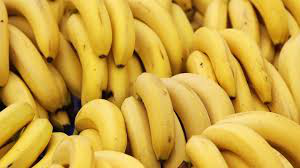

In [19]:
image

In [20]:
feature_extractor = ViTFeatureExtractor.from_pretrained('google/vit-base-patch16-224')
model = ViTForImageClassification.from_pretrained('google/vit-base-patch16-224')


In [21]:

inputs = feature_extractor(images=image, return_tensors="pt")
outputs = model(**inputs)
logits = outputs.logits
# model predicts one of the 1000 ImageNet classes



In [22]:
type(logits)

torch.Tensor

In [23]:
predicted_class_idx = logits.argmax(-1).item()

In [24]:
print("Predicted class:", model.config.id2label[predicted_class_idx])


Predicted class: banana


In [25]:
all_pred = model.config.id2label[predicted_class_idx]

# Spacy nlp distance from Compost
The idea is to look for the distance between the predicted word of the visual model form a group of word that describe what compost is

In [26]:
#!python -m spacy download en_core_web_md

In [27]:
import spacy

In [28]:
with open("compost_related_words.txt") as f:
    text = f.readlines()

In [29]:
text = ", ".join([e.replace("\n", "") for e in text])

In [30]:
nlp = spacy.load("en_core_web_md")
compost_tokens = nlp(text)

for token in compost_tokens[:5]:
    print(token.text, token.has_vector, token.vector_norm, token.is_oov)

fertilizer True 33.290913 False
, True 64.72698 False
humus True 57.607 False
, True 64.72698 False
manure True 33.290913 False


In [31]:
type(token)

spacy.tokens.token.Token

In [32]:
pred_text = f"{food_pred} {all_pred}"

In [33]:
pred_text

'Banana pudding banana'

In [34]:
text

'fertilizer, humus, manure, vegetable, biogas, recycling, waste, feces, seedlings, recycle, anaerobic digestion, landfills, nutrients, mulch, nitrogen, sawdust, phosphorus, topsoil, urine, garbage, bins, tilth, trash, perlite, organic, loam, recyclables, horticultural, sewage sludge, compost pile, landfill, ammonium, nitrate, nitrification, gardens, landscaping, horticulture, convert, composition, agriculture, biodegradation, plant, pesticide, evaporation, earthworm, organic fertilizer, potassium, flies, odor, urea, potting, heap, portmanteau, recyclable, water-soluble, firewood, storing, organic matter, slag, composting, heaps, piles, composted, coir, wastes, rubbish, soil amendment, biodegradable, peat, pile, rotted, organic farming, litter, green waste, recycled, leaching, rainwater, soil, nuts, detritus, edible, aerobic bacteria, tailings, sift, rotting, sand, fertilize, carbon dioxide, rots, sorbent, discard, drying, tubers, stain, mulching, groundwater, eisenia fetida, coals, can

In [35]:
text_prediction_tokens = nlp(pred_text)

In [36]:
compost_token = nlp("compost")

In [41]:
sim = compost_token.similarity(text_prediction_tokens)

In [40]:
sim = text_prediction_tokens.similarity(compost_tokens)


In [43]:
print(f"Similarity: {sim}")

if sim >= 0.36:
    print(f"You can make compost with {pred_text} 😀")
else:
    print(f"You cannot make compost with {pred_text} 🥵")

Similarity: 0.3778137636313898
You can make compost with Banana pudding banana 😀


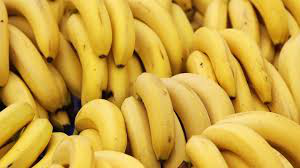

In [44]:
image